# **Investigate Hotel Business**

### Dataset column

* `hotel` : The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel
* `is_canceled` : Value indicating if the booking was canceled (1) or not (0)
* `lead_time` : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* `arrival_date_year` : Year of arrival date
* `arrival_date_month` : Month of arrival date with 12 categories: “January” to “December”
* `arrival_date_week_number` : Week number of the arrival date
* `arrival_date_day_of_month` : Day of the month of the arrival date
* `stays_in_weekend_nights` : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* `stays_in_weekdays_nights` : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights
* `adults` : Number of adults
* `children` : Number of children
* `babies` : Number of babies
* `meal` : Meal menu
* `city` : City of origin
* `market_segment` : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* `distribution_channel` : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* `is_repeated_guest` : Value indicating if the booking name was from a repeated guest (1) or not (0)
* `previous_cancellations` : Number of previous bookings that were cancelled by the customer prior to the current booking
* `previous_bookings_not_canceled` : Number of previous bookings not cancelled by the customer prior to the current booking
* `booking_changes` : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* `deposit_type` : No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay
* `agent` : ID of the travel agency that made the booking
* `company` : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* `days_in_waiting_list` : Number of days the booking was in the waiting list before it was confirmed to the customer
* `customer_type` : Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
* `adr` : Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)
* `required_car_parking_spaces` : Number of car parking spaces required by the customer
* `total_of_special_requests` : Number of special requests made by the customer (e.g. twin bed or high floor)
* `reservation_status` : Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

### **EDA**

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#show all columns
pd.pandas.set_option('display.max_columns', None)

In [3]:
# load data
df = pd.read_csv('dataset/hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

* pada dataset ini terlihat bahwa kolom `children`,`city`,`agent` dan `company` memiliki null value
* tipe data pada kolom `children`,`agent`,`company` seharusnya integer bukan float

In [5]:
# check duplicates in data
print('duplicated data:', df.duplicated().sum())

duplicated data: 33261


In [6]:
# copy data for backup
df2 = df.copy()

### **Data Preprocessing**

In [7]:
# drop duplicates
df.drop_duplicates(keep='first',inplace=True)

In [8]:
# check null values and create on dataframe
null_cols = df.columns[df.isna().any()]
df_null = df[null_cols].isna().sum().to_frame().reset_index()
df_null.columns = ['column_name', 'null_count']

# count percentage of null values
df_null['null_percentage'] = df_null['null_count'] / df.shape[0]*100
df_null

,column_name,null_count,null_percentage
0,children,4,0.004644
1,city,450,0.522472
2,agent,11941,13.864088
3,company,81019,94.067039


* akan dilakukan imputasi pada kolom `children`, `city`, dan `agent`
* kolom `company` akan dihapus karena memiliki null value yang sangat banyak

In [9]:
# input null values on 'children' column with value 0
df['children'] = df['children'].fillna(0)

# input null values on 'city' column with value 'Unknown'
df['city'] = df['city'].fillna('Unknown')

# input null values on 'agent' column with median
df['agent'] = df['agent'].fillna(df['agent'].median())

df.drop('company', axis=1, inplace=True)

print('null values:', df.isna().sum().sum())


null values: 0


In [10]:
# fix the data types
df['children'] = df['children'].astype('int')
df['agent'] = df['agent'].astype('int')

In [11]:
# split columns into categories and numeric
cat_colm       = df.select_dtypes(include='object').columns
num_colm       = df.select_dtypes(exclude='object').columns


In [12]:
df[cat_colm].describe().T

,count,unique,top,freq
hotel,86129,2,City Hotel,52575
arrival_date_month,86129,12,October,11150
meal,86129,5,Breakfast,67088
city,86129,178,Kota Denpasar,26903
market_segment,86129,8,Online TA,51393
distribution_channel,86129,5,TA/TO,68141
deposit_type,86129,3,No Deposit,85024
customer_type,86129,4,Personal,71648
reservation_status,86129,3,Check-Out,62393


In [13]:
df[num_colm].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86129.0,0.275587,0.446812,0.00,0.00,0.00,1.00,1.0
lead_time,86129.0,79.246224,85.498774,0.00,11.00,49.00,124.00,737.0
arrival_date_year,86129.0,2018.215467,0.683948,2017.00,2018.00,2018.00,2019.00,2019.0
arrival_date_week_number,86129.0,26.796433,13.675130,1.00,16.00,27.00,37.00,53.0
arrival_date_day_of_month,86129.0,15.806511,8.840436,1.00,8.00,16.00,23.00,31.0
stays_in_weekend_nights,86129.0,1.009753,1.033402,0.00,0.00,1.00,2.00,19.0
stays_in_weekdays_nights,86129.0,2.633225,2.058316,0.00,1.00,2.00,4.00,50.0
adults,86129.0,1.878554,0.627558,0.00,2.00,2.00,2.00,55.0
children,86129.0,0.140278,0.458337,0.00,0.00,0.00,0.00,10.0
babies,86129.0,0.010984,0.114421,0.00,0.00,0.00,0.00,10.0



* pada kolom `lead_time`, `agent`,`days_in_waiting_list`,`adr` memiliki jarak mean dan median yang sangat jauh atau ( distribusi skewed)
* kolom `adr` memiliki value yang bernilai negatif 

In [14]:
# check unique values
for col in cat_colm:
    print(f'unique value on column {col}: {df[col].unique()}')
    print('\n')

unique value on column hotel: ['Resort Hotel' 'City Hotel']


unique value on column arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']


unique value on column meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']


unique value on column city: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'Unknown' 'Kabupaten Tangerang'
 'Kota Semarang' 'Kota Serang' 'Kota Tangerang' 'Kota Bogor'
 'Kabupaten Bandung' 'Kabupaten Magelang' 'Kabupaten Sumedang'
 'Kota Jakarta Timur' 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu'
 'Kabupaten Belitung' 'Kota Jakarta Pusat' 'Kota Jakarta Selatan'
 'Kota Surabaya' 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi'
 'Kota Jakarta Barat' 'Kota Bengkulu' 'Kabupaten Bandung Barat'
 'Kabupaten Bekasi' 'Kabupaten Bogor' 'Kabupaten Ciamis'
 'Kabupaten Cianjur' 'Kabupaten Cirebon' 'Kota Cimahi'
 'Kabupaten Indramayu'

In [15]:
# replace Undefined values with No Meal
df['meal'].replace('Undefined', 'No Meal', inplace=True)
df['meal'].value_counts()

meal
Breakfast     67088
No Meal        9896
Dinner         8798
Full Board      347
Name: count, dtype: int64

In [16]:
# change negative values on 'adr'column to 0
df['adr'] = df['adr'].apply(lambda x: 0 if x < 0 else x) 

In [17]:
print(f'data sebelum preprocessing:',df.shape[0],'\n')

# create new column and removing unnecessary data
df['guest'] = df['adults'] + df['children'] + df['babies']
print('Data dengan 0 guest : {0} out of {1} all data'.format(df[df['guest']==0].shape[0],df.shape[0]))
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('Data dengan 0 night : {0} out of {1} all data'.format(df[df['stay_duration']==0].shape[0],df.shape[0]))
print('\n')

#remove unnecessary data
df_new = df[(df['guest'] > 0) & (df['stay_duration'] > 0)]

print('data setelah preprocessing:',df_new.shape[0])

data sebelum preprocessing: 86129 

Data dengan 0 guest : 165 out of 86129 all data
Data dengan 0 night : 645 out of 86129 all data




data setelah preprocessing: 85378


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85378 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85378 non-null  object 
 1   is_canceled                     85378 non-null  int64  
 2   lead_time                       85378 non-null  int64  
 3   arrival_date_year               85378 non-null  int64  
 4   arrival_date_month              85378 non-null  object 
 5   arrival_date_week_number        85378 non-null  int64  
 6   arrival_date_day_of_month       85378 non-null  int64  
 7   stays_in_weekend_nights         85378 non-null  int64  
 8   stays_in_weekdays_nights        85378 non-null  int64  
 9   adults                          85378 non-null  int64  
 10  children                        85378 non-null  int64  
 11  babies                          85378 non-null  int64  
 12  meal                            8537

In [19]:
df_new.to_csv('dataset/hotel_bookings_clean.csv', index=False)

### **Jumlah Booking Hotel Berdasarkan Tipe Hotel**

In [20]:
df2 = df_new.copy()

In [21]:
# aggreate on columns 'hotel' and 'arrival_date_month' with count of column 'arrival_date_year'
df2_group = df2.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique','count']).reset_index()
df2_group.columns = ['hotel', 'arrival_month', 'unique_year', 'total_booking']
df2_group

,hotel,arrival_month,unique_year,total_booking
0,City Hotel,April,2,3514
1,City Hotel,August,2,4908
2,City Hotel,December,2,4009
3,City Hotel,February,2,2952
4,City Hotel,January,2,2849
5,City Hotel,July,2,5321
6,City Hotel,June,2,5017
7,City Hotel,March,2,2674
8,City Hotel,May,2,4777
9,City Hotel,November,2,4040


Pada data diatas dapat kita ketahui bahwa pada bulan September dan Oktober data di ambil dari data selama 3 tahun, sedangkan bulan lain hanya diambil dari data selama 2 tahun, sehingga perlu dilakukan normalisasi agar perbandingannya sesuai.

In [22]:
# normalize total booking by month in different year
df2_group['average_total_booking'] = round(df2_group['total_booking'] / df2_group['unique_year'])
df2_group.sample(9)

,hotel,arrival_month,unique_year,total_booking,average_total_booking
13,Resort Hotel,August,2,2705,1352.0
4,City Hotel,January,2,2849,1424.0
3,City Hotel,February,2,2952,1476.0
17,Resort Hotel,July,2,2863,1432.0
8,City Hotel,May,2,4777,2388.0
11,City Hotel,September,3,5657,1886.0
10,City Hotel,October,3,6473,2158.0
9,City Hotel,November,2,4040,2020.0
22,Resort Hotel,October,3,4615,1538.0


In [23]:
# ordered month
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2_group['month'] = pd.Categorical(df2_group['arrival_month'], categories=ordered_month, ordered=True)
df2_group.sample(9)

,hotel,arrival_month,unique_year,total_booking,average_total_booking,month
4,City Hotel,January,2,2849,1424.0,January
1,City Hotel,August,2,4908,2454.0,August
11,City Hotel,September,3,5657,1886.0,September
14,Resort Hotel,December,2,2618,1309.0,December
6,City Hotel,June,2,5017,2508.0,June
7,City Hotel,March,2,2674,1337.0,March
23,Resort Hotel,September,3,4263,1421.0,September
2,City Hotel,December,2,4009,2004.0,December
12,Resort Hotel,April,2,2453,1226.0,April


Text(2.7, 4500, 'Holiday Season')

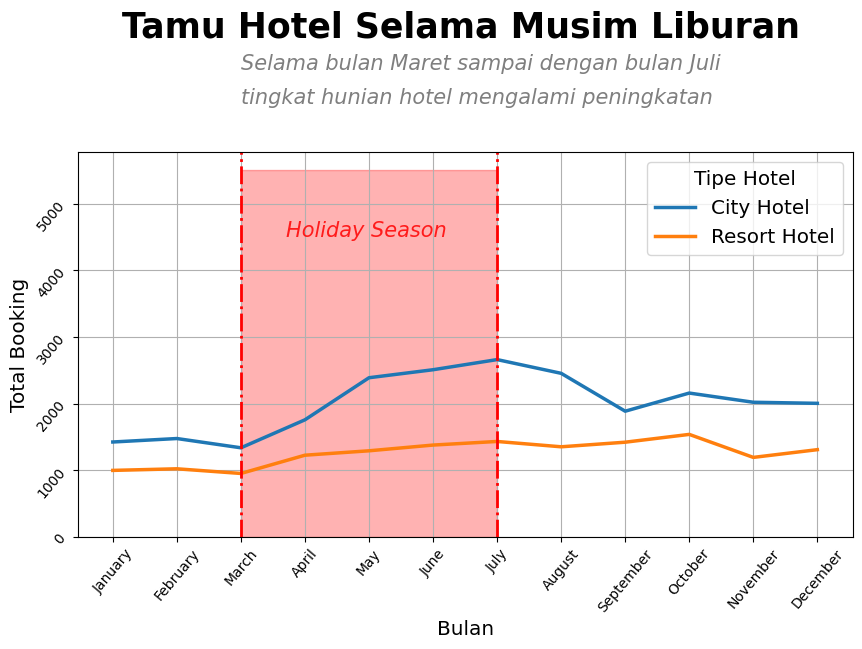

In [137]:
# tentukan ukuran figure
plt.figure(figsize=(10,5))
sns.lineplot(x='month', y='average_total_booking', hue='hotel', data=df2_group,size='hotel',sizes=(2.5,2.5))\

plt.tick_params(axis='both',which='major', rotation=50,labelsize=10)
plt.grid()
plt.legend(title='Tipe Hotel', fontsize='x-large', title_fontsize='x-large')

#create label
plt.xlabel('Bulan', fontsize='x-large')
plt.ylabel('Total Booking', fontsize='x-large')
plt.text(0.15, 7500, 'Tamu Hotel Selama Musim Liburan', fontsize=25,fontweight='bold')
plt.text(2, 7000, 'Selama bulan Maret sampai dengan bulan Juli', fontsize=15,alpha=0.5,fontstyle="italic")
plt.text(2, 6500, 'tingkat hunian hotel mengalami peningkatan', fontsize=15,fontstyle="italic",alpha=0.5)



plt.stackplot(np.arange(2,7,1),[[5500]], color='r', alpha=0.3)
plt.axvline(2, c = 'r', ls = '-.', lw = 2)
plt.axvline(2*3, c = 'r', ls = '-.', lw = 2)
plt.text(2.7, 4500, s = 'Holiday Season', alpha = 0.85, fontstyle="italic", c='r',fontsize=15)
